# Test data science

##Importation des librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sncf = pd.read_csv("C:/Users/KOUADIO Christiane/Documents/Traitement_données/validations-sncf.csv", sep=';', nrows = 5000)

In [3]:
# lire l'en-tête du data frame
sncf.head(10)

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,2019-07-29,100,110.0,725.0,REAUMUR-SEBASTOPOL,73636,?,93
1,2019-07-29,100,110.0,725.0,REAUMUR-SEBASTOPOL,73636,AMETHYSTE,322
2,2019-07-29,100,110.0,725.0,REAUMUR-SEBASTOPOL,73636,NAVIGO JOUR,8
3,2019-07-29,100,110.0,725.0,REAUMUR-SEBASTOPOL,73636,NON DEFINI,10
4,2019-07-29,100,110.0,728.0,RENNES,73640,NAVIGO,1303
5,2019-07-29,100,110.0,728.0,RENNES,73640,TST,40
6,2019-07-29,100,110.0,729.0,REPUBLIQUE,71311,NON DEFINI,15
7,2019-07-29,100,110.0,729.0,REPUBLIQUE,71311,TST,1824
8,2019-07-29,100,110.0,734.0,REUILLY-DIDEROT,71654,AMETHYSTE,487
9,2019-07-29,100,110.0,734.0,REUILLY-DIDEROT,71654,AUTRE TITRE,106


In [4]:
# faire le point sur les variables et les observations
sncf.shape

(5000, 8)

In [5]:
sncf.dtypes

JOUR                object
CODE_STIF_TRNS       int64
CODE_STIF_RES      float64
CODE_STIF_ARRET    float64
LIBELLE_ARRET       object
ID_REFA_LDA         object
CATEGORIE_TITRE     object
NB_VALD             object
dtype: object

In [6]:
# Description des statistiques sur le contenu de chaque colonne
sncf.describe(include='all')

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
count,5000,5000.000000,4988.000000,4988.000000,5000,4993,5000,5000
unique,9,NaN,NaN,NaN,654,644,9,1329
top,2019-07-30,NaN,NaN,NaN,LA DEFENSE-GRANDE ARCHE,?,NAVIGO,Moins de 5
freq,991,NaN,NaN,NaN,31,67,740,828
mean,NaN,481.202000,501.416800,482.625702,NaN,NaN,NaN,NaN
std,NaN,349.050458,357.917341,294.019088,NaN,NaN,NaN,NaN
min,NaN,100.000000,110.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,100.000000,110.000000,223.000000,NaN,NaN,NaN,NaN
50%,NaN,800.000000,802.000000,469.000000,NaN,NaN,NaN,NaN
75%,NaN,800.000000,850.000000,740.000000,NaN,NaN,NaN,NaN


#### Q1) Les 20 premiers arrêts en terme de validation

In [7]:
# pour répondre à cette question nous allons nous intéresser aux series LIBELLE_ARRET et NB_VALID
#comptage des valeurs

In [8]:
print(sncf['NB_VALD'].value_counts())
#nous constatons la présence de la modalité 'Moins de 5 == 828'

Moins de 5    828
5             112
6              70
7              55
8              55
             ... 
3415            1
1106            1
396             1
1368            1
7236            1
Name: NB_VALD, Length: 1329, dtype: int64


In [9]:
#nous allons préparer la variable NB_VALID qui comporte des 'Moins de 5' sur certaines lignes
# Identifier les lignes sur lesquelles on a des 'Moins de 5'
print(sncf['NB_VALD']=="Moins de 5")

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996     True
4997     True
4998     True
4999     True
Name: NB_VALD, Length: 5000, dtype: bool


In [10]:
# détermination du positionnement de la modalaité "Moins de 5"
sncf['NB_VALD'][10:15] 
#Ou print(sncf.iloc[13,-1]) pour afficher la valeur à la 3ième ligne et dernière colonne

10           635
11            47
12           163
13    Moins de 5
14            55
Name: NB_VALD, dtype: object

In [11]:
print((sncf['NB_VALD']=="Moins de 5").value_counts())

False    4172
True      828
Name: NB_VALD, dtype: int64


In [12]:
# remplacer cette colonne modifiée "NB_VALD" dans le data frame  de basen sncf 
#Remplacer la modalité 'Moins de 5'par 4 pour avoir une serie quantitative
sncf['NB_VALD']=sncf['NB_VALD'].replace(["Moins de 5"], 4)
#sncf['NB_VALD'].head()

In [13]:
sncf.head()

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,2019-07-29,100,110.0,725.0,REAUMUR-SEBASTOPOL,73636,?,93
1,2019-07-29,100,110.0,725.0,REAUMUR-SEBASTOPOL,73636,AMETHYSTE,322
2,2019-07-29,100,110.0,725.0,REAUMUR-SEBASTOPOL,73636,NAVIGO JOUR,8
3,2019-07-29,100,110.0,725.0,REAUMUR-SEBASTOPOL,73636,NON DEFINI,10
4,2019-07-29,100,110.0,728.0,RENNES,73640,NAVIGO,1303


In [14]:
sncf.describe(include='all')

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
count,5000,5000.000000,4988.000000,4988.000000,5000,4993,5000,5000.0
unique,9,NaN,NaN,NaN,654,644,9,1329.0
top,2019-07-30,NaN,NaN,NaN,LA DEFENSE-GRANDE ARCHE,?,NAVIGO,4.0
freq,991,NaN,NaN,NaN,31,67,740,828.0
mean,NaN,481.202000,501.416800,482.625702,NaN,NaN,NaN,NaN
std,NaN,349.050458,357.917341,294.019088,NaN,NaN,NaN,NaN
min,NaN,100.000000,110.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,100.000000,110.000000,223.000000,NaN,NaN,NaN,NaN
50%,NaN,800.000000,802.000000,469.000000,NaN,NaN,NaN,NaN
75%,NaN,800.000000,850.000000,740.000000,NaN,NaN,NaN,NaN


In [15]:
print((sncf['NB_VALD']=="Moins de 5").value_counts())# nous avons que des valeurs numériques sur la série désormais

False    5000
Name: NB_VALD, dtype: int64


In [16]:
sncf['NB_VALD'] = sncf.NB_VALD.astype('int64')# modification du genre de la série

In [17]:
sncf.describe(include='all')# Nous avons bien les différentes statistiques sur la série quantitative

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
count,5000,5000.000000,4988.000000,4988.000000,5000,4993,5000,5000.0000
unique,9,NaN,NaN,NaN,654,644,9,NaN
top,2019-07-30,NaN,NaN,NaN,LA DEFENSE-GRANDE ARCHE,?,NAVIGO,NaN
freq,991,NaN,NaN,NaN,31,67,740,NaN
mean,NaN,481.202000,501.416800,482.625702,NaN,NaN,NaN,739.6284
std,NaN,349.050458,357.917341,294.019088,NaN,NaN,NaN,2870.5163
min,NaN,100.000000,110.000000,1.000000,NaN,NaN,NaN,4.0000
25%,NaN,100.000000,110.000000,223.000000,NaN,NaN,NaN,11.0000
50%,NaN,800.000000,802.000000,469.000000,NaN,NaN,NaN,81.0000
75%,NaN,800.000000,850.000000,740.000000,NaN,NaN,NaN,367.0000


In [18]:
sncf.dtypes # certification que la série "Nb_VALD" est bien une série quantitative

JOUR                object
CODE_STIF_TRNS       int64
CODE_STIF_RES      float64
CODE_STIF_ARRET    float64
LIBELLE_ARRET       object
ID_REFA_LDA         object
CATEGORIE_TITRE     object
NB_VALD              int64
dtype: object

In [19]:
#Sélectionner certaines colonnes de notre data frame avec lesquelles nous allons travailler
sncf_split=sncf[['JOUR','LIBELLE_ARRET','CATEGORIE_TITRE', 'NB_VALD']]

In [20]:
sncf_split.head() # nous avons des caractère spéciaux ('?') dans la série['CATEGORIE_TITRE'] 

,JOUR,LIBELLE_ARRET,CATEGORIE_TITRE,NB_VALD
0,2019-07-29,REAUMUR-SEBASTOPOL,?,93
1,2019-07-29,REAUMUR-SEBASTOPOL,AMETHYSTE,322
2,2019-07-29,REAUMUR-SEBASTOPOL,NAVIGO JOUR,8
3,2019-07-29,REAUMUR-SEBASTOPOL,NON DEFINI,10
4,2019-07-29,RENNES,NAVIGO,1303


In [21]:
sncf_split.describe(include= 'all')

,JOUR,LIBELLE_ARRET,CATEGORIE_TITRE,NB_VALD
count,5000,5000,5000,5000.0000
unique,9,654,9,NaN
top,2019-07-30,LA DEFENSE-GRANDE ARCHE,NAVIGO,NaN
freq,991,31,740,NaN
mean,NaN,NaN,NaN,739.6284
std,NaN,NaN,NaN,2870.5163
min,NaN,NaN,NaN,4.0000
25%,NaN,NaN,NaN,11.0000
50%,NaN,NaN,NaN,81.0000
75%,NaN,NaN,NaN,367.0000


In [22]:
# regrouper les arrêts par la sommes du NB_VALD 
sncf_ordered = sncf_split.groupby(['LIBELLE_ARRET'])['NB_VALD'].sum() 
sncf_ordered
#Nous avons les arrêts par ordres alphabétiques qu'il faudra ranger par ordre décroissant
    # pour bien répondre à notre question

LIBELLE_ARRET
ABBESSES                         768
ABLON                           1914
ACHERES-GRAND-CORMIER             23
ACHERES-VILLE                   4036
AEROPORT CHARLES DE GAULLE 1    1083
                                ... 
VOLTAIRE (LEON BLUM)            9073
VOSVES                            12
VULAINES-SUR-SEINE-SAMOREAU       14
WAGRAM                          7474
YERRES                           372
Name: NB_VALD, Length: 654, dtype: int64

In [23]:
sncf_index = sncf_split.groupby(['LIBELLE_ARRET'])['NB_VALD'].sum().reset_index()
sncf_index # afficher l'indexation pour faciliter les traitement par la suite

,LIBELLE_ARRET,NB_VALD
0,ABBESSES,768
1,ABLON,1914
2,ACHERES-GRAND-CORMIER,23
3,ACHERES-VILLE,4036
4,AEROPORT CHARLES DE GAULLE 1,1083
...,...,...
649,VOLTAIRE (LEON BLUM),9073
650,VOSVES,12
651,VULAINES-SUR-SEINE-SAMOREAU,14
652,WAGRAM,7474


In [24]:
prem_arret = sncf_index.sort_values(by = ['NB_VALD'], ascending = False)[0:20]
prem_arret # Ranger par ordre décroissant et sélectionner les 20 premiers arrêts

,LIBELLE_ARRET,NB_VALD
540,SAINT-LAZARE,259997
282,LA DEFENSE-GRANDE ARCHE,87839
226,GARE DE L'EST,83721
228,GARE DU NORD,78517
510,REPUBLIQUE,71948
399,MONTPARNASSE,50920
23,AUSTERLITZ,48221
194,ESPLANADE DE LA DEFENSE,47925
583,STALINGRAD,43465
238,GRANDS BOULEVARDS (RUE MONTMARTRE),37861


In [25]:
prem_arret1 = prem_arret.sort_values(by = ['NB_VALD'], ascending = True)
prem_arret1 # rangement ordre croissant

,LIBELLE_ARRET,NB_VALD
632,VILLENEUVE-SAINT-GEORGES,24628
531,SAINT-DENIS,24935
352,MAISONS-ALFORT-ALFORTVILLE,25161
280,LA COURNEUVE 8 MAI 1945,25981
301,LE KREMLIN-BICETRE,28322
584,STRASBOURG-SAINT-DENIS,28456
117,CHAUSSEE D'ANTIN (LA FAYETTE),31630
111,CHATEAU DE VINCENNES,33497
230,GARGES-SARCELLES,35746
252,HOTEL DE VILLE,37704


#### Q2) Une illustraion graphique de ce classement

Text(0.5, 0, 'Nombre de validation\n')

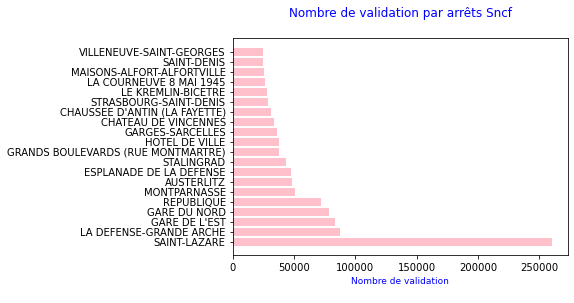

In [26]:
## Première présentation
plt.barh( prem_arret['LIBELLE_ARRET'], prem_arret['NB_VALD'], color = 'pink')
plt.title("Nombre de validation par arrêts Sncf\n", fontsize=12, color='blue')#e74c3c
plt.xlabel("Nombre de validation\n", fontsize= 9, color='blue')#c0392b
#plt.xticks(rotation= 15)#45
#plt.figure(figsize=(10,6))
#plt.tight_layout()# recentralisation du graphique

Text(0.5, 0, 'Nombre de validation\n')

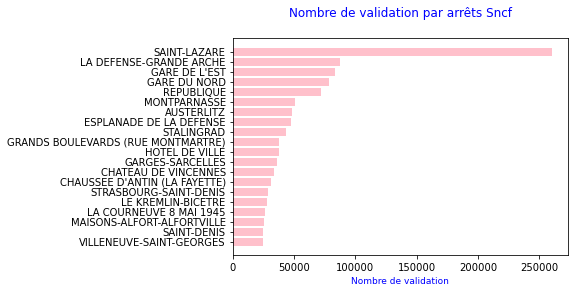

In [27]:
## Deuxième présentation
plt.barh( prem_arret1['LIBELLE_ARRET'], prem_arret1['NB_VALD'], color = 'pink')
plt.title("Nombre de validation par arrêts Sncf\n", fontsize=12, color='blue')#e74c3c
plt.xlabel("Nombre de validation\n", fontsize= 9, color='blue')#c0392b

#### Q3) Classification des arrêts en se basant sur le nombre de validations par titre de transport

In [28]:
# Déterminer le mode de la serie ["CATEGORIE_TITRE"]
sncf_split["CATEGORIE_TITRE"].describe()

count       5000
unique         9
top       NAVIGO
freq         740
Name: CATEGORIE_TITRE, dtype: object

In [29]:
# Afficher la colonnes "CATEGORIE_TITRE"
sncf_split[550:880] # nous remanquons des '?'(876) dans cette série que nous allons remplacer 
#par le mode de la série 'NAVIGO'

,JOUR,LIBELLE_ARRET,CATEGORIE_TITRE,NB_VALD
550,2019-07-29,LA DEFENSE-GRANDE ARCHE,NON DEFINI,8
551,2019-07-29,LA DEFENSE-GRANDE ARCHE,TST,801
552,2019-07-29,ACHERES-GRAND-CORMIER,TST,9
553,2019-07-29,NEUVILLE UNIVERSITE,NAVIGO,2076
554,2019-07-29,NEUVILLE UNIVERSITE,NAVIGO JOUR,4
...,...,...,...,...
875,2019-07-30,MIRABEAU,AMETHYSTE,114
876,2019-07-30,MIROMESNIL,?,97
877,2019-07-30,MIROMESNIL,AUTRE TITRE,126
878,2019-07-30,MONCEAU,FGT,85


In [30]:
# Remplacer les '?' par 'NAVIGO' le mode de la serie "CATEGORIE_TITRE"
# réeinitialiser le data frame avec la nouvelle série "CATEGORIE_TITRE" corrigée
sncf_split["CATEGORIE_TITRE"]=sncf_split["CATEGORIE_TITRE"].replace(['?'], 'NAVIGO')
#sncf_split["CATEGORIE_TITRE"][250:780]

<ipython-input-30-5574853666f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sncf_split["CATEGORIE_TITRE"]=sncf_split["CATEGORIE_TITRE"].replace(['?'], 'NAVIGO')


In [31]:
# vérification du remplacement des '?'
print((sncf_split["CATEGORIE_TITRE"]=="?").value_counts()) #nous n'avons plus de caractère spéciaux dans cette série

False    5000
Name: CATEGORIE_TITRE, dtype: int64


In [32]:
# Vérification du remplacement des'?' par le mode (Navigo)
sncf_split[4240:4500]

,JOUR,LIBELLE_ARRET,CATEGORIE_TITRE,NB_VALD
4240,2019-08-14,MARCADET-POISSONNIERS,NAVIGO,80
4241,2019-08-14,MARCADET-POISSONNIERS,AUTRE TITRE,64
4242,2019-08-14,MARCADET-POISSONNIERS,FGT,712
4243,2019-08-14,MARCADET-POISSONNIERS,IMAGINE R,874
4244,2019-08-14,MARCADET-POISSONNIERS,TST,1462
...,...,...,...,...
4495,2019-08-14,CHILLY-MAZARIN,FGT,27
4496,2019-08-14,CHILLY-MAZARIN,NAVIGO,272
4497,2019-08-14,CHILLY-MAZARIN,NAVIGO JOUR,4
4498,2019-08-14,CHOISY-LE-ROI,AMETHYSTE,289


In [33]:
# Explorer la serie qualitatve
print((sncf_split["CATEGORIE_TITRE"]=="NON DEFINI").value_counts()) #Nous avons que 228 'NON DEFINI'
#sncf_split["LIBELLE_ARRET"].describe()

False    4772
True      228
Name: CATEGORIE_TITRE, dtype: int64


In [34]:
sncf_split.describe(include= 'all')

,JOUR,LIBELLE_ARRET,CATEGORIE_TITRE,NB_VALD
count,5000,5000,5000,5000.0000
unique,9,654,8,NaN
top,2019-07-30,LA DEFENSE-GRANDE ARCHE,NAVIGO,NaN
freq,991,31,1342,NaN
mean,NaN,NaN,NaN,739.6284
std,NaN,NaN,NaN,2870.5163
min,NaN,NaN,NaN,4.0000
25%,NaN,NaN,NaN,11.0000
50%,NaN,NaN,NaN,81.0000
75%,NaN,NaN,NaN,367.0000


In [35]:
# regrouper la sommes du nombre de validation par arrêt et  catégorie de titre
sncf_class = sncf_split.groupby(["CATEGORIE_TITRE","LIBELLE_ARRET"])['NB_VALD'].sum().reset_index()
sncf_class

,CATEGORIE_TITRE,LIBELLE_ARRET,NB_VALD
0,AMETHYSTE,ABLON,51
1,AMETHYSTE,AEROPORT CHARLES DE GAULLE 1,42
2,AMETHYSTE,AEROPORT CHARLES DE GAULLE 2-TGV,137
3,AMETHYSTE,ALESIA,857
4,AMETHYSTE,ALEXANDRE DUMAS,367
...,...,...,...
3008,TST,VIRY-CHATILLON,140
3009,TST,VITRY-SUR-SEINE,652
3010,TST,VOLONTAIRES,173
3011,TST,WAGRAM,167


<BarContainer object of 3013 artists>

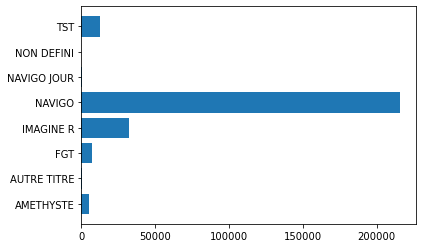

In [36]:
plt.barh( sncf_class['CATEGORIE_TITRE'], sncf_class['NB_VALD'] )# sur la question de la classification, je cherche encore, 
    #je n'ai pas encore trouvé labonne réponse